<a href="https://colab.research.google.com/github/Rayonil/Sustainable_Energy_Analysis/blob/main/An%C3%A1lise_Energia_Sustent%C3%A1vel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Energia Sustentável Global**


Conjunto de dados abrangente que apresenta indicadores de energia sustentável e outros fatores úteis em todos os países de 2000 a 2020.

Aspectos vitais como acesso à eletricidade, energia renovável, emissões de carbono, intensidade energética, fluxos financeiros e crescimento económico.

## **1. Importar as Bibliotecas**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## **2. Loading Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Global Data on Sustainable Energy (2000-2020)/global-data-on-sustainable-energy.csv')

In [ ]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


## **3. Dynamic world map with a slider**

In [ ]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='seaborn',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

In [ ]:
column_name = 'Access to electricity (% of population)'
plot_world_map(column_name)

In [ ]:
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map(column_name)

## **4. EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [ ]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
# Filtrando dados numéricos
numeric_data = df.select_dtypes(include='number')

# Filtrando dados categóricos
categorical_data = df.select_dtypes(exclude='number')

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# CalcuCalcular a correlação dos dados numéricos
correlation_matrix = numeric_df.corr()

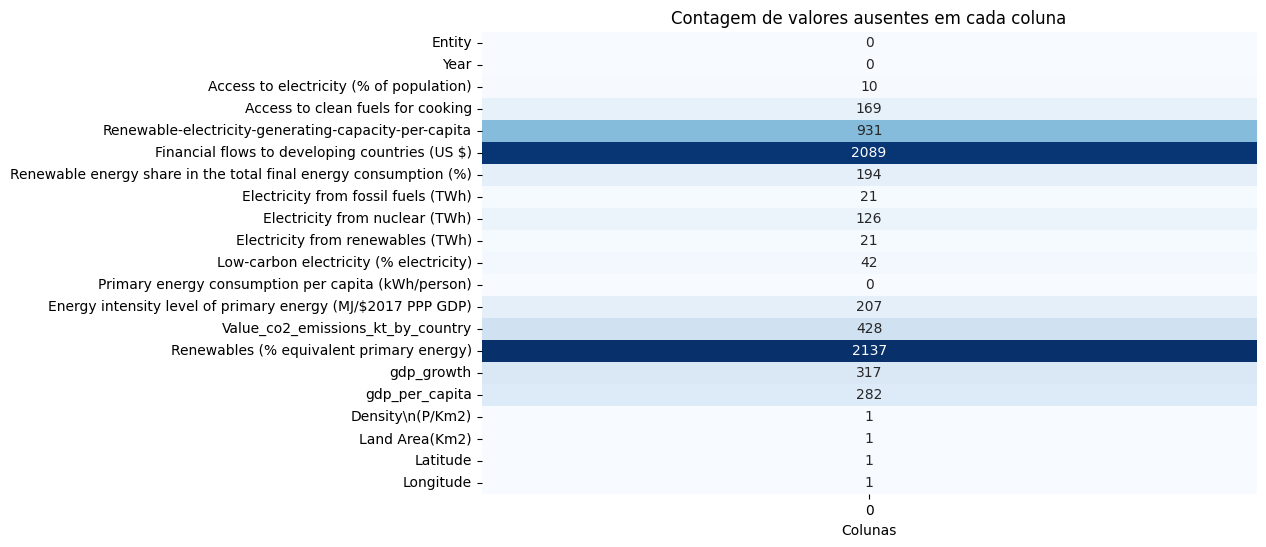

In [ ]:
# Criar um heatmap
fig_missing_values = plt.figure(figsize=(10,6))
sns.heatmap(df.isna().sum().to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)

plt.title('Contagem de valores ausentes em cada coluna')
plt.xlabel('Colunas')
plt.ylabel('')
plt.show()


In [ ]:
# Eliminar as colunas com um grande número de valores ausentes
df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [ ]:
# Preencher os valores faltantes com a média
columns_to_fill_mean = ['Access to clean fuels for cooking',
                        'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)',
                        'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']

df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x:x.fillna(x.mean()))

In [ ]:
# Eliminar as linhas restantes com valores ausentes
df = df.dropna()

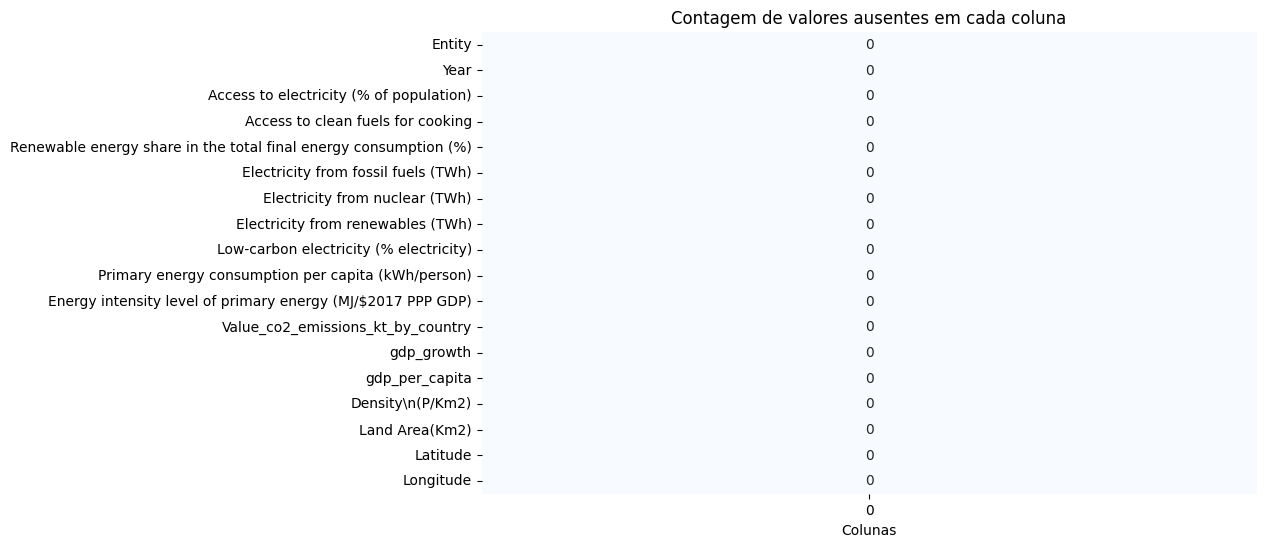

In [ ]:
# Verificar novamente com um heatmap
fig_missing_values = plt.figure(figsize=(10,6))
sns.heatmap(df.isna().sum().to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)

plt.title('Contagem de valores ausentes em cada coluna')
plt.xlabel('Colunas')
plt.ylabel('')
plt.show()


In [ ]:
# Verifica se há linhas duplicadas
num_duplicate = df.duplicated().sum()
print("Número de linhas duplicadas:", num_duplicate)

Número de linhas duplicadas: 0


## **5. Visualization**

Electricity Access vs GDP Per Capita
Renewable Share vs GDP Growth
Renewable Share vs Electricity Access
Renewable Share Over Time


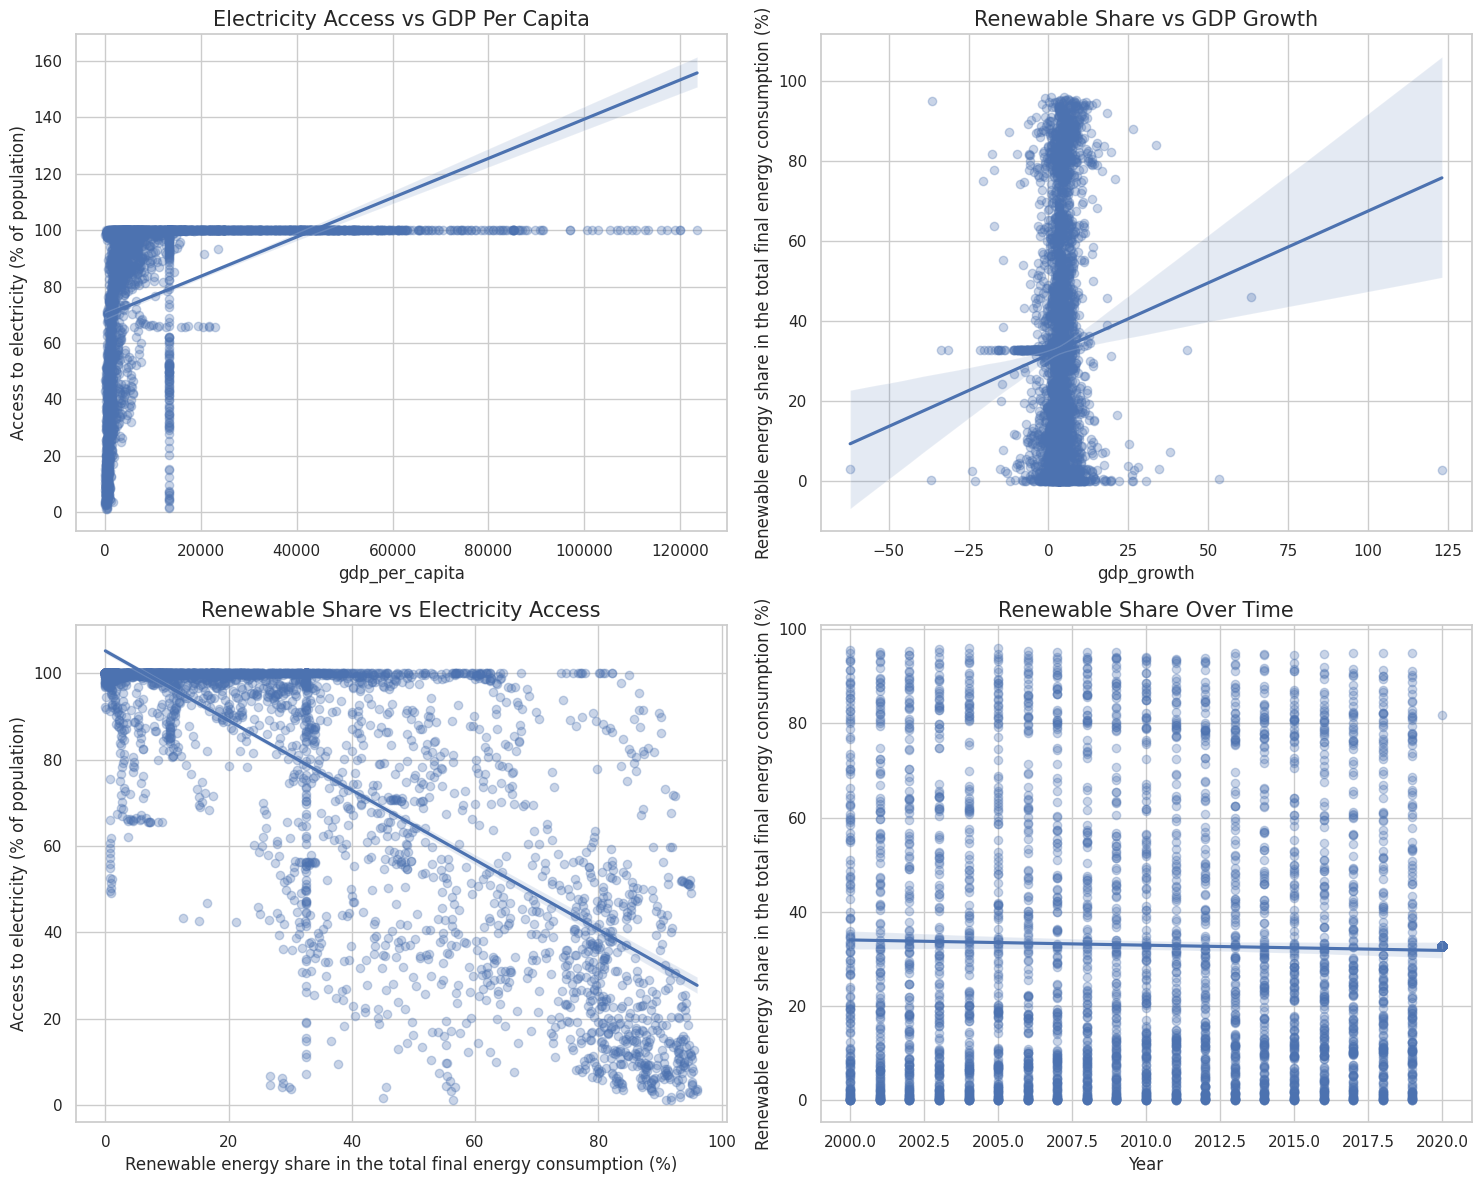

In [ ]:
# Definir o estilo para o mar
sns.set(style="whitegrid")

# Definir as colunas e títulos das visualizações
columns = [
    ('gdp_per_capita', 'Access to electricity (% of population)', 'Electricity Access vs GDP Per Capita'),
    ('gdp_growth', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share vs GDP Growth'),
    ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Share vs Electricity Access'),
    ('Year', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share Over Time')
]

# criar os subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Achate os eixos para facilitar a iteração
axes = axes.flatten()

# Itere pelas colunas e plote as visualizações
for i, (x_col, y_col, title) in enumerate(columns):
  plt.subplot(2, 2, i + 1) # use 2 linhas e 2 colunas

  if "Year" in title:
    sns.lineplot(x=x_col, y=y_col, data=df, ax=axes[i])
  else:
    print(title)
    sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])

  plt.title(title, size=15)
  plt.xlabel(x_col)
  plt.ylabel(y_col)

# ajustar o layout para melhor visualização
plt.tight_layout()
plt.show()

In [ ]:
# Criar uma copia do DataFrame
df_copy = df.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land'})

# Selecionar as colunas específica para visualização
columns_for_visualization = [('gdp_per_capita', 'gdp_growth', 'GDP per Capita vs GDP Growth'),
                              ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Energy vs Access to Electricity'),
                              ('Year', 'CO2', 'CO2 Emissions Over Years')]

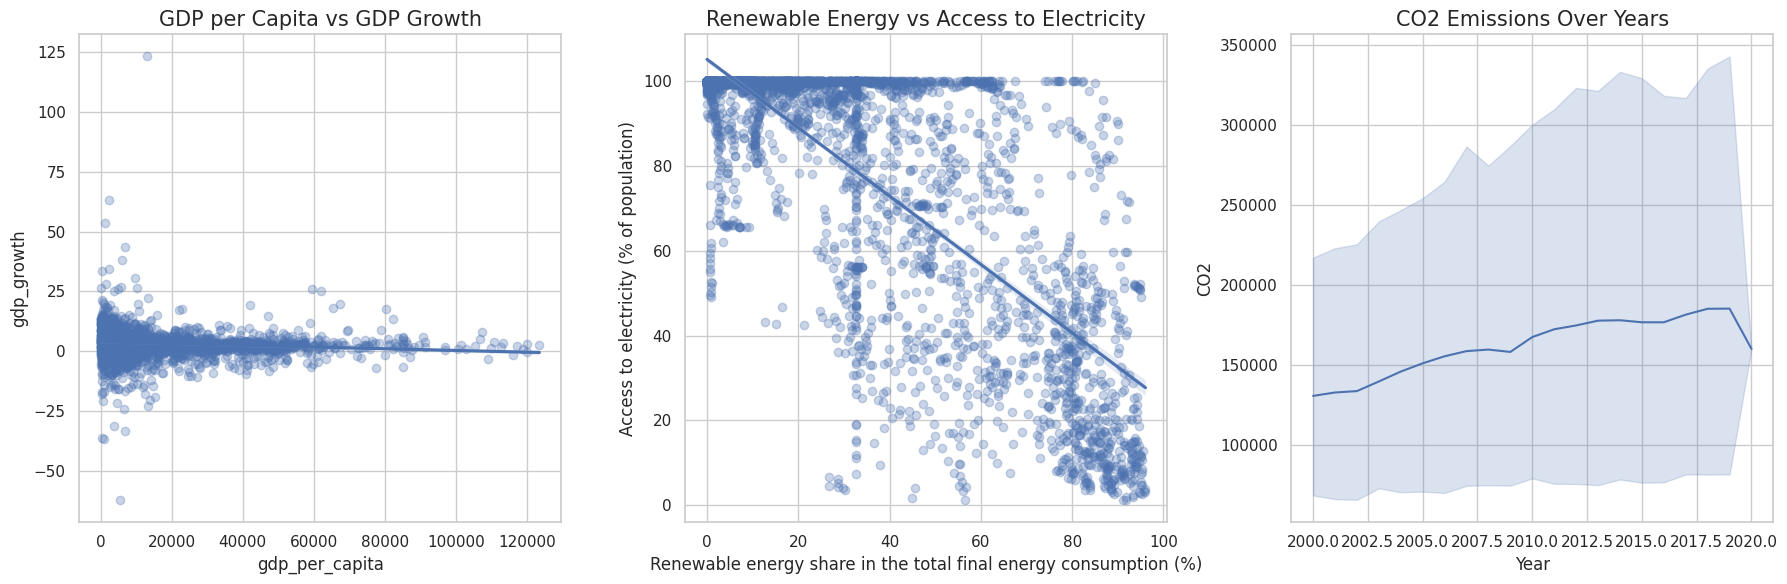

In [ ]:
# Criar os subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
axes = axes.flatten()

# Títulos das visualizações a serem exibidas
selected_titles = ['GDP per Capita vs GDP Growth',
                   'Renewable Energy vs Access to Electricity',
                   'CO2 Emissions Over Years']

# Itere pelas colunas e plote as visualizações selecionadas
for i, (x_col, y_col, title) in enumerate(columns_for_visualization):
  if title not in selected_titles:
    continue
  plt.subplot(1,3, selected_titles.index(title) + 1)
  if 'Year' in title:
    sns.lineplot(x=x_col, y=y_col, data=df_copy, ax=axes[selected_titles.index(title)])
  else:
    sns.regplot(x=x_col, y=y_col, data=df_copy, scatter_kws={'alpha':0.3},
                ax=axes[selected_titles.index(title)])

  plt.title(title, size=15)
  plt.xlabel(x_col)
  plt.ylabel(y_col)
# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## **6. Correlation**

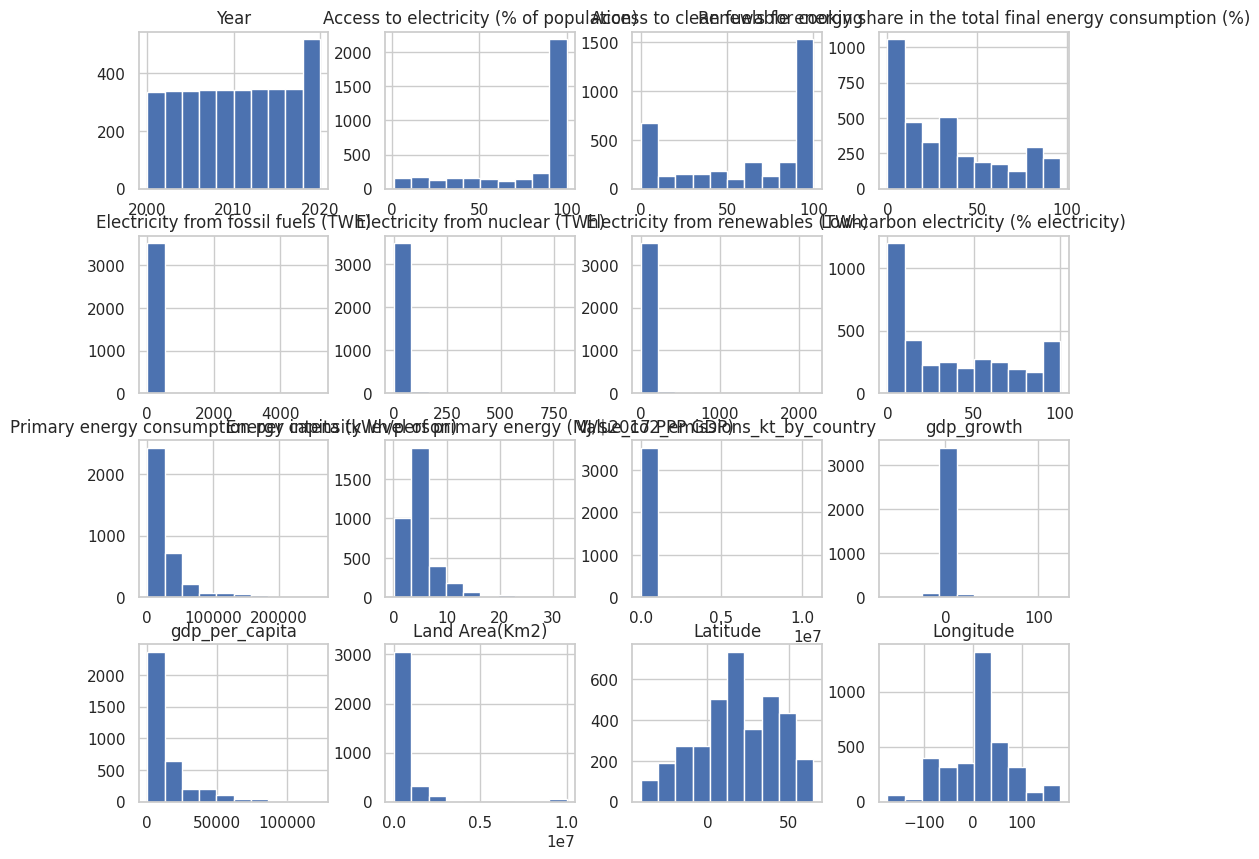

In [ ]:
# Visualize histogramas para cada coluna numérica
df.hist(figsize=(12, 10))
plt.show()

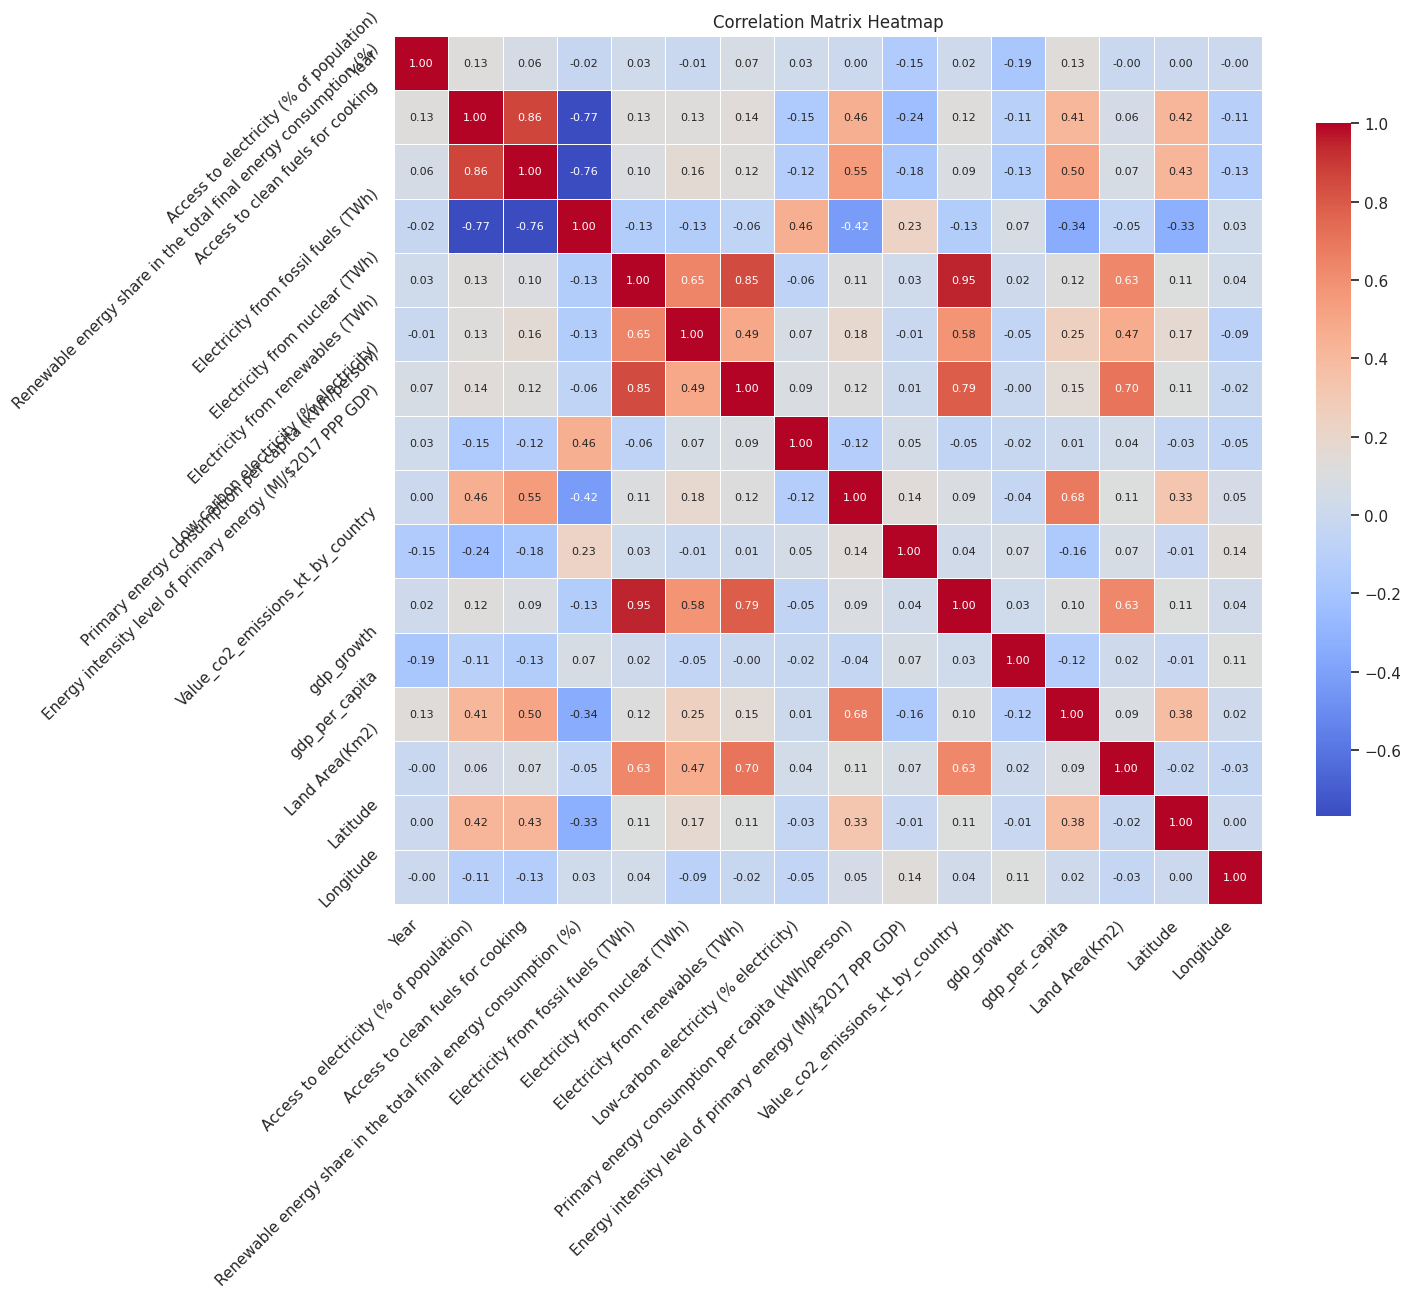

In [ ]:
# Aumente o tamanho da figura para um mapa de calor mais claro
plt.figure(figsize=(14, 12))
# Visualize a matriz de correlação usando um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()